# Project - Classifying Dieabetes Risk

### STEP 4 : EDA and Hypothesis Testinng

    # EDA helps us understand variable distributions, detect skewness, identify patterns, 
    # and uncover potential issues such as outliers or imbalance.
    # Bivariate analysis helps reveal relationships between predictors and diabetes status.
    # Hypothesis testing validates these relationships statistically and supports model assumptions.

In [ ]:
import pandas as pd

#### IMPORT THE DATA SET WHICH WE already Cleaned in STEP 3 to perform EDA and Hypothesis testing

In [ ]:
df = pd.read_csv(r"C:\Users\Junaid\MSC-DS\RM\STEP_2_BRFSS\both-CLEANED_LABELED_BRFSS2024.csv")

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)


In [ ]:
df.isna().sum()

In [ ]:
# df = df.drop(columns=['_RACE_LABEL', '_RACE'])


##### Cleaning Labes becuase few columns got not mapped correctly so they converted to nan

In [36]:
mode_value = df['_IMPRACE_LABEL'].mode()[0]
df['_IMPRACE_LABEL'] = df['_IMPRACE_LABEL'].fillna(mode_value)

#### Recode PERSDOC3: convert (1 = Yes → 1), (2 = No → 0), (3 = Don't know → 0)


In [37]:
df['PERSDOC3'] = df['PERSDOC3'].replace({
    1: 1,   # Yes
    2: 0,   # No
    3: 0    # Don’t know → treat as No
})


#### Recode _AGEG5YR: map each age group code to its midpoint age (for analysis-friendly numeric age)


In [38]:
age_mapping = {
    1: 21, 2: 27, 3: 32, 4: 37, 5: 42,
    6: 47, 7: 52, 8: 57, 9: 62, 10: 67,
    11: 72, 12: 77, 13: 82
}

df['_AGEG5YR'] = df['_AGEG5YR'].map(age_mapping)


#### Convert all selected binary variables: recode (1 = Yes → 1) and (2 = No → 0) for consistency


In [39]:
binary_cols = [
    'MEDCOST1', 'EXERANY2', 'CVDSTRK3', 'CHCKDNY2',
    'DIFFWALK', 'SMOKE100', '_METSTAT', '_TOTINDA',
    '_RFDRHV9', '_HLTHPL2', 'ADDEPEV3'
]

for col in binary_cols:
    df[col] = df[col].replace({1: 1, 2: 0})


In [40]:
df['_SEX'] = df['_SEX'].replace({
    1: 0,   # Male
    2: 1    # Female
})


#### Convert _BMI5 from scaled value (BMI*100) back to actual BMI by dividing by 100


In [41]:
df['_BMI5'] = df['_BMI5'] / 100

#### Recode DIABETE4: (1 = Yes, 4 = Prediabetes) → 1, and (2 = No, 3 = during pregnency) → 0 for binary classification


In [42]:
df['DIABETE4'] = df['DIABETE4'].map({1: 1, 4: 1, 2: 0, 3: 0})


In [43]:
df['DIABETE4'].unique()

array([nan,  1.])

In [44]:
df['DIABETE4'].value_counts()

DIABETE4
1.0    76008
Name: count, dtype: int64

In [45]:
df.isna().sum()


GENHLTH                0
_SEX                   0
PHYSHLTH               0
MENTHLTH               0
POORHLTH               0
PERSDOC3               0
MEDCOST1               0
EXERANY2               0
CVDSTRK3               0
CHCKDNY2               0
MARITAL                0
EDUCA                  0
EMPLOY1                0
_INCOMG1               0
DIFFWALK               0
SMOKE100               0
LSATISFY               0
_METSTAT               0
SSBFRUT3               0
_TOTINDA               0
_IMPRACE               0
_RFDRHV9               0
_HLTHPL2               0
_RACE                  0
_AGEG5YR          449360
_BMI5                  0
ADDEPEV3               0
EMTSUPRT               0
DIABETE4          373352
GENHLTH_LABEL          0
_SEX_LABEL             0
PHYSHLTH_LABEL         0
MENTHLTH_LABEL         0
POORHLTH_LABEL         0
PERSDOC3_LABEL         0
MEDCOST1_LABEL         0
EXERANY2_LABEL         0
CVDSTRK3_LABEL         0
CHCKDNY2_LABEL         0
MARITAL_LABEL          0


In [46]:
df.isna().sum().sum()


np.int64(881294)

In [47]:
#EDA

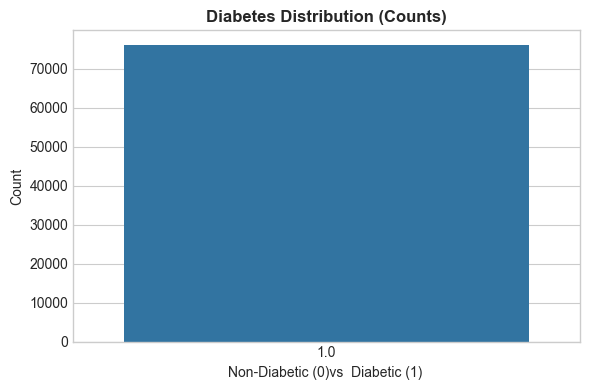

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="DIABETE4", data=df, color=color)
plt.title("Diabetes Distribution (Counts)", fontweight="bold")
plt.xlabel("Non-Diabetic (0)vs  Diabetic (1) ")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("diabetes_counts.png", dpi=300)
plt.show()

In [49]:
df['DIABETE4'].value_counts()


DIABETE4
1.0    76008
Name: count, dtype: int64

In [50]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)


Column: GENHLTH
[3. 1. 2. 4. 5.]
----------------------------------------
Column: _SEX
[0.]
----------------------------------------
Column: PHYSHLTH
[ 2.  6. 30.  7.  5. 14.  1. 25. 20.  3.  4. 15. 10.  8. 27. 12. 29. 28.
 21.  9. 19. 16. 23. 18. 17. 24. 11. 22. 13. 26.]
----------------------------------------
Column: MENTHLTH
[ 7. 15.  1. 30.  2.  8. 10.  6.  5.  4.  9. 25.  3. 20. 29. 11. 12. 14.
 26. 17. 23. 21. 28. 18. 22. 13. 19. 16. 27. 24.]
----------------------------------------
Column: POORHLTH
[ 7.  1. 14. 30. 20. 10. 25.  8.  2. 15.  4.  5.  3. 28. 18. 12.  6. 21.
  9. 27. 16. 24. 13. 19. 26. 23. 17. 11. 29. 22.]
----------------------------------------
Column: PERSDOC3
[0. 1.]
----------------------------------------
Column: MEDCOST1
[0. 1.]
----------------------------------------
Column: EXERANY2
[1. 0.]
----------------------------------------
Column: CVDSTRK3
[0. 1.]
----------------------------------------
Column: CHCKDNY2
[0. 1.]
-----------------------------------

In [ ]:
df.to_csv("BRFSS-final_used_EDA_hypothesisbrfss.csv", index=False)

# EDA

# DIABETES PRECENTAGE

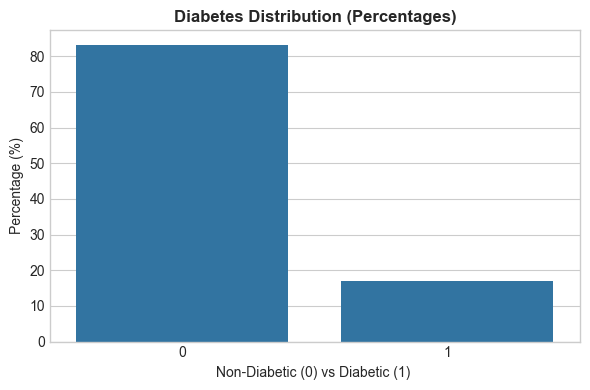

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

# calculate percentages
percentage = df['DIABETE4'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=percentage.index, y=percentage.values, color=color)
plt.title("Diabetes Distribution (Percentages)", fontweight="bold")
plt.xlabel( "Non-Diabetic (0) vs Diabetic (1) ")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig("diabetes_percent.png", dpi=300)
plt.show()


    The dataset shows a significant imbalance between diabetic (1) and non-diabetic (0) respondents.
    
    The majority of individuals fall into the non-diabetic category, while the diabetic group represents a considerably smaller percentage.

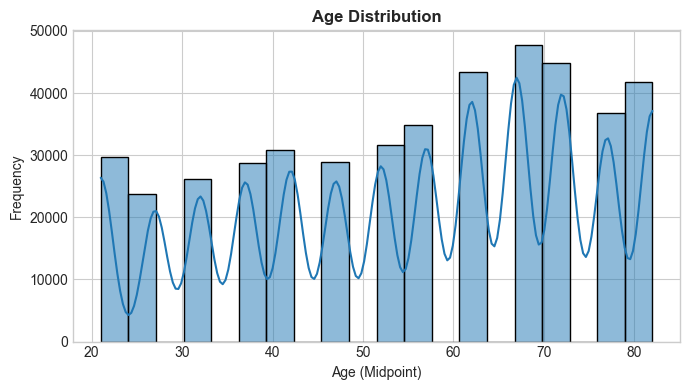

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(7,4))
sns.histplot(df['_AGEG5YR'], kde=True, color=color, bins=20)
plt.title("Age Distribution", fontweight="bold")
plt.xlabel("Age (Midpoint)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_hist.png", dpi=300)
plt.show()


    Insight: Age Distribution
    
    The age variable is grouped into midpoint ages (e.g., 21, 27, 32… up to 82).
    
    The distribution shows a gradual rise in the number of respondents as age increases.
    
    Participation is noticeably higher among older adults, particularly between 60–80 years, where the frequency peaks.
    
    Younger age groups (20–40 years) have much lower representation compared to senior

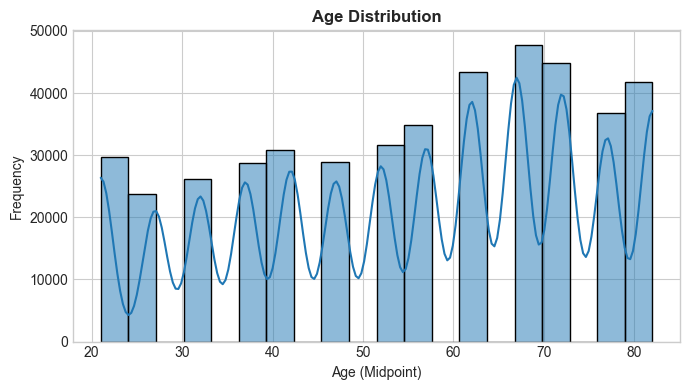

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(7,4))
sns.histplot(df['_AGEG5YR'], kde=True, color=color, bins=20)
plt.title("Age Distribution", fontweight="bold")
plt.xlabel("Age (Midpoint)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_hist.png", dpi=300)
plt.show()


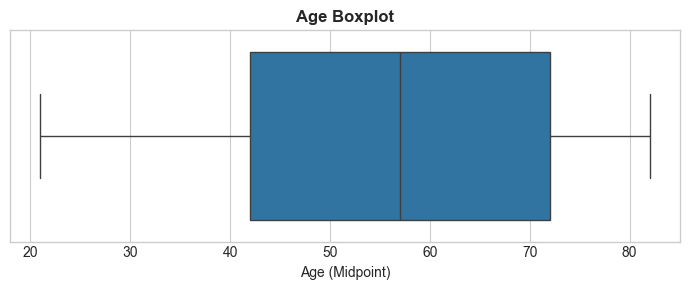

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(7,3))
sns.boxplot(x=df['_AGEG5YR'], color=color)
plt.title("Age Boxplot", fontweight="bold")
plt.xlabel("Age (Midpoint)")
plt.tight_layout()
plt.savefig("age_boxplot.png", dpi=300)
plt.show()


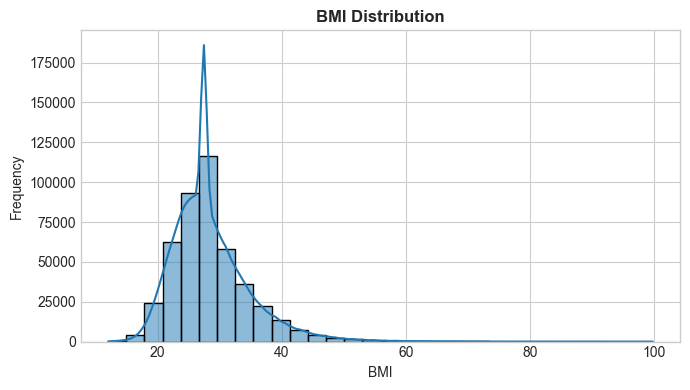

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(7,4))
sns.histplot(df['_BMI5'], kde=True, color=color, bins=30)
plt.title("BMI Distribution", fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("bmi_hist.png", dpi=300)
plt.show()


    Insight: BMI Distribution
    
    The BMI values in the dataset follow a right-skewed distribution, meaning most individuals fall in the lower BMI range while fewer have extremely high BMI.
    
    The highest concentration of respondents lies between 20 and 35 BMI, which corresponds to normal weight to moderately obese categories.
    
    A very sharp peak appears around BMI ≈ 25, indicating this is the most common body mass index among the surveyed population.
    Since BMI is a key predictor of diabetes, this distribution helps explain the higher diabetes prevalence in the higher-BMI groups.

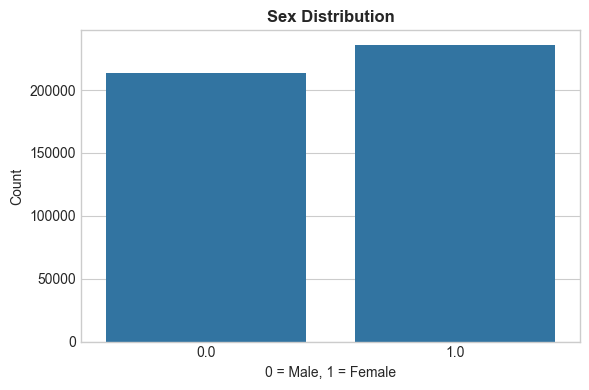

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="_SEX", data=df, color=color)
plt.title("Sex Distribution", fontweight="bold")
plt.xlabel("0 = Male, 1 = Female")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("sex_distribution.png", dpi=300)
plt.show()


    above there is eqally appearnce of male and female and maintend balnaced datam

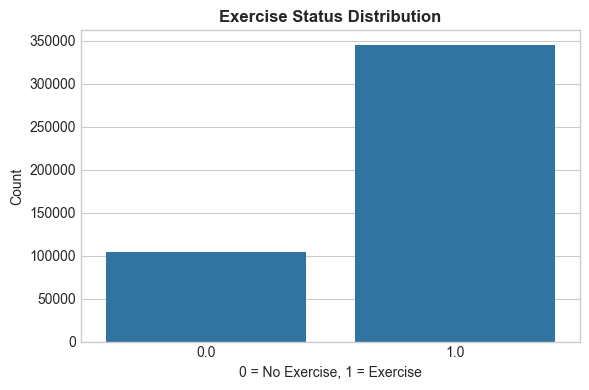

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="EXERANY2", data=df, color=color)
plt.title("Exercise Status Distribution", fontweight="bold")
plt.xlabel("0 = No Exercise, 1 = Exercise")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("exercise_distribution.png", dpi=300)
plt.show()


    A large majority of respondents report engaging in exercise, while a smaller portion does not.
    
    This indicates the sample is generally physically active, which may influence health-related outcomes.

In [96]:
df[['EXERANY2','SMOKE100','MEDCOST1','CVDSTRK3','CHCKDNY2']].sum()


EXERANY2    344736.0
SMOKE100    165081.0
MEDCOST1     42705.0
CVDSTRK3     20373.0
CHCKDNY2     23435.0
dtype: float64

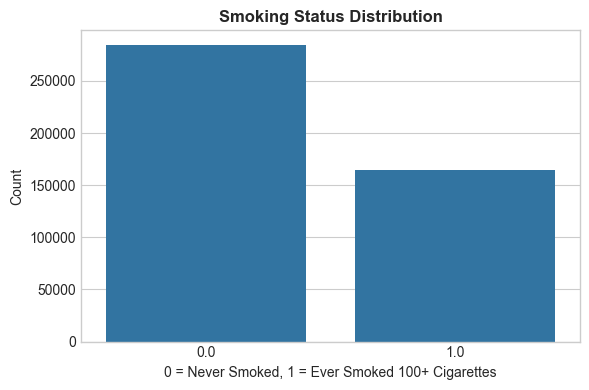

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="SMOKE100", data=df, color=color)
plt.title("Smoking Status Distribution", fontweight="bold")
plt.xlabel("0 = Never Smoked, 1 = Ever Smoked 100+ Cigarettes")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("smoke100_distribution.png", dpi=300)
plt.show()


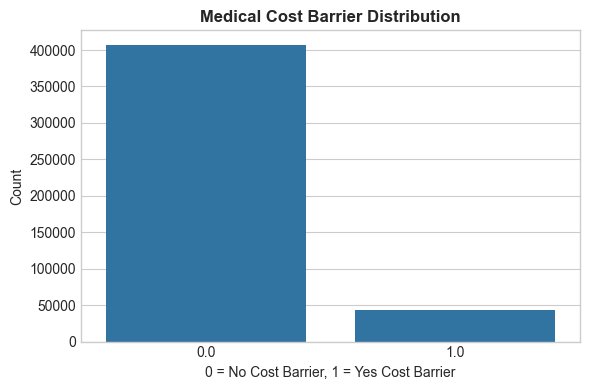

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="MEDCOST1", data=df, color=color)
plt.title("Medical Cost Barrier Distribution", fontweight="bold")
plt.xlabel("0 = No Cost Barrier, 1 = Yes Cost Barrier")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("medcost_distribution.png", dpi=300)
plt.show()


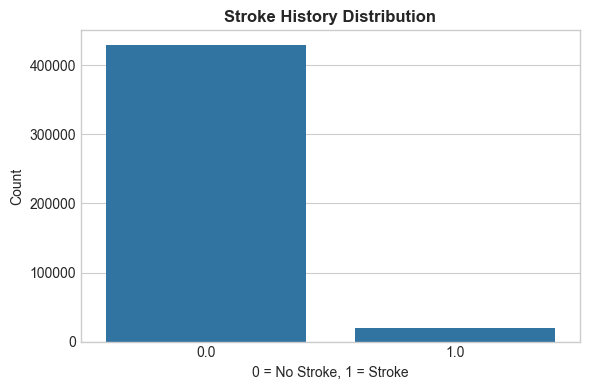

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="CVDSTRK3", data=df, color=color)
plt.title("Stroke History Distribution", fontweight="bold")
plt.xlabel("0 = No Stroke, 1 = Stroke")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("stroke_distribution.png", dpi=300)
plt.show()


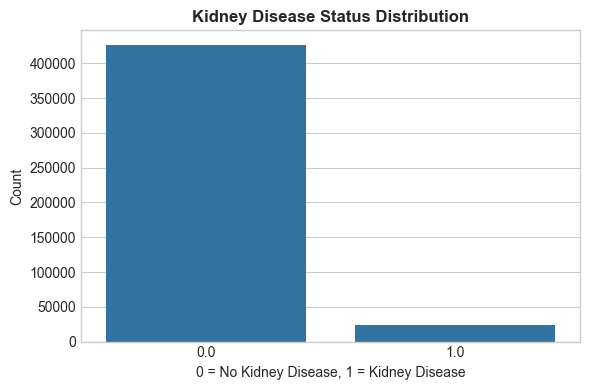

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="CHCKDNY2", data=df, color=color)
plt.title("Kidney Disease Status Distribution", fontweight="bold")
plt.xlabel("0 = No Kidney Disease, 1 = Kidney Disease")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("kidney_disease_distribution.png", dpi=300)
plt.show()


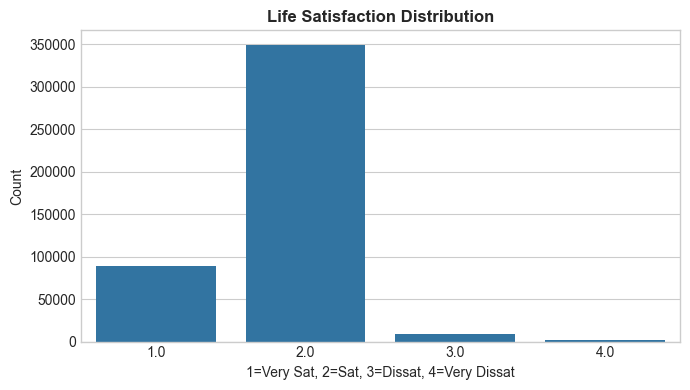

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(7,4))
sns.countplot(x="LSATISFY", data=df, color=color)
plt.title("Life Satisfaction Distribution", fontweight="bold")
plt.xlabel("1=Very Sat, 2=Sat, 3=Dissat, 4=Very Dissat")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("life_satisfaction_distribution.png", dpi=300)
plt.show()


    Most respondents report being satisfied with life (category 2), followed by a smaller group that is very satisfied (category 1).
    
    Dissatisfied and very dissatisfied categories are very rare, indicating overall positive life satisfaction in the population.

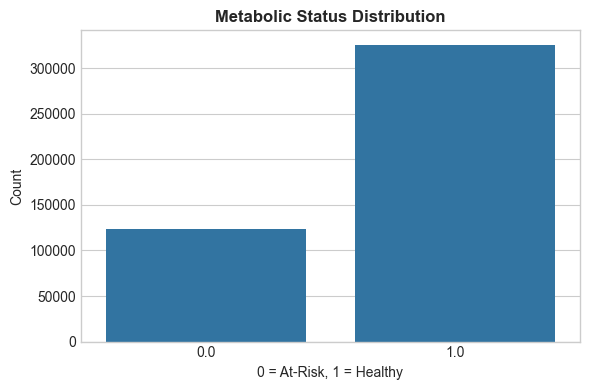

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="_METSTAT", data=df, color=color)
plt.title("Metabolic Status Distribution", fontweight="bold")
plt.xlabel("0 = At-Risk, 1 = Healthy")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("metstat_distribution.png", dpi=300)
plt.show()


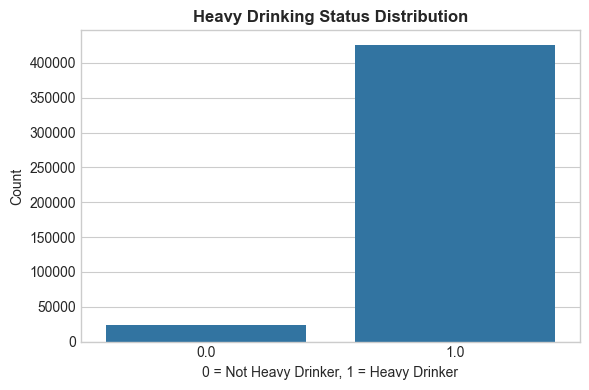

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="_RFDRHV9", data=df, color=color)
plt.title("Heavy Drinking Status Distribution", fontweight="bold")
plt.xlabel("0 = Not Heavy Drinker, 1 = Heavy Drinker")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("heavy_drinker_distribution.png", dpi=300)
plt.show()


    # there are more heavy driners so this is not relateble in real world so we will not use it for modeling

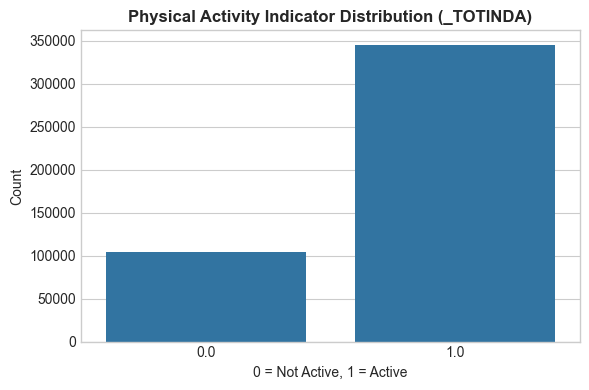

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="_TOTINDA", data=df, color=color)
plt.title("Physical Activity Indicator Distribution (_TOTINDA)", fontweight="bold")
plt.xlabel("0 = Not Active, 1 = Active")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("totinda_distribution.png", dpi=300)
plt.show()


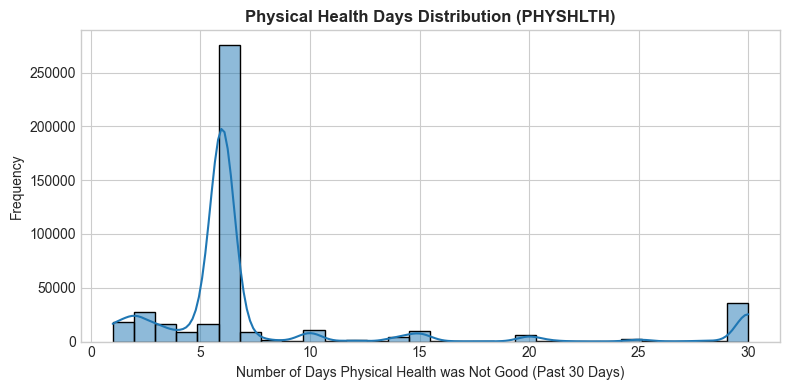

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(8,4))
sns.histplot(df['PHYSHLTH'], bins=30, color=color, kde=True)
plt.title("Physical Health Days Distribution (PHYSHLTH)", fontweight="bold")
plt.xlabel("Number of Days Physical Health was Not Good (Past 30 Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("physhlth_distribution.png", dpi=300)
plt.show()


    Most respondents report very few days of poor physical health, clustering around 0–7 days.
    
    A smaller group reports 30 days, indicating chronic or continuous physical health issues.
    
    The distribution is right-skewed, with poor health days being uncommon for most people.

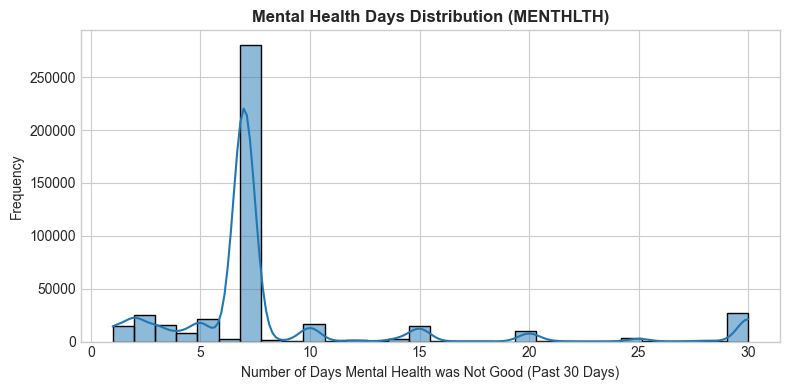

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(8,4))
sns.histplot(df['MENTHLTH'], bins=30, color=color, kde=True)
plt.title("Mental Health Days Distribution (MENTHLTH)", fontweight="bold")
plt.xlabel("Number of Days Mental Health was Not Good (Past 30 Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("menthlth_distribution.png", dpi=300)
plt.show()


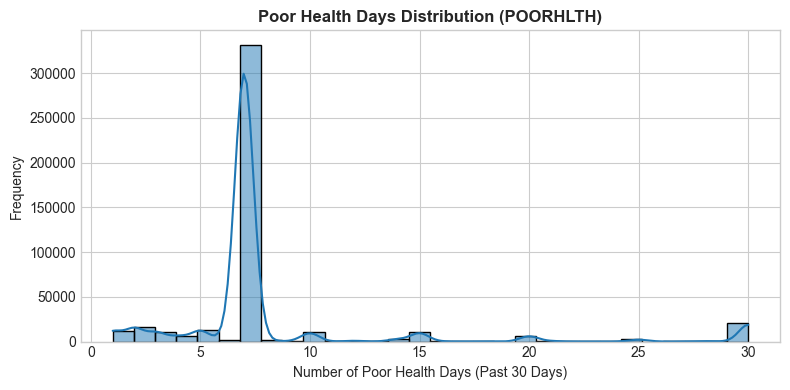

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(8,4))
sns.histplot(df['POORHLTH'], bins=30, color=color, kde=True)
plt.title("Poor Health Days Distribution (POORHLTH)", fontweight="bold")
plt.xlabel("Number of Poor Health Days (Past 30 Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("poorhlth_distribution.png", dpi=300)
plt.show()


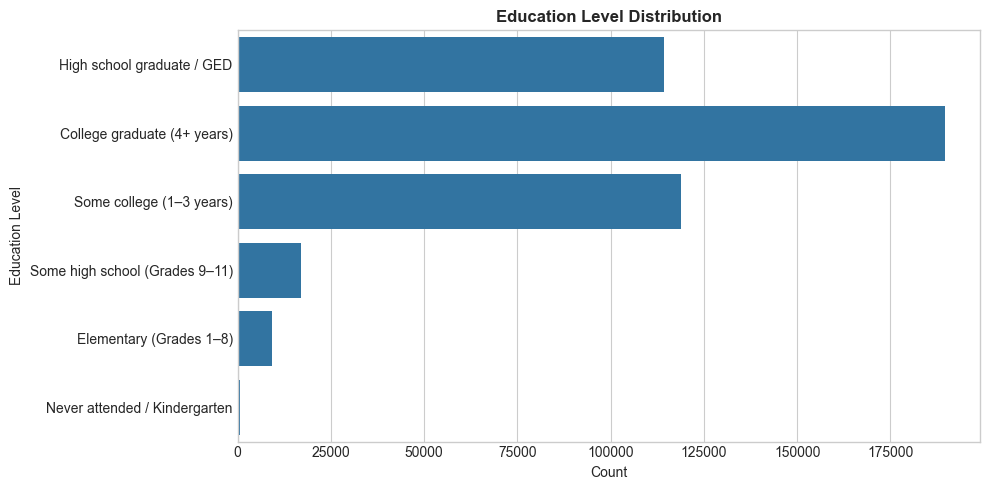

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="EDUCA_LABEL", data=df, color=color)
plt.title("Education Level Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.tight_layout()
plt.savefig("EDUCA_LABEL_distribution.png", dpi=300)
plt.show()


    Most respondents have some college education or are college graduates.
    
    Very few individuals fall into the low-education groups (elementary or never attended school).
    
    The dataset skews toward a moderately to highly educated population.

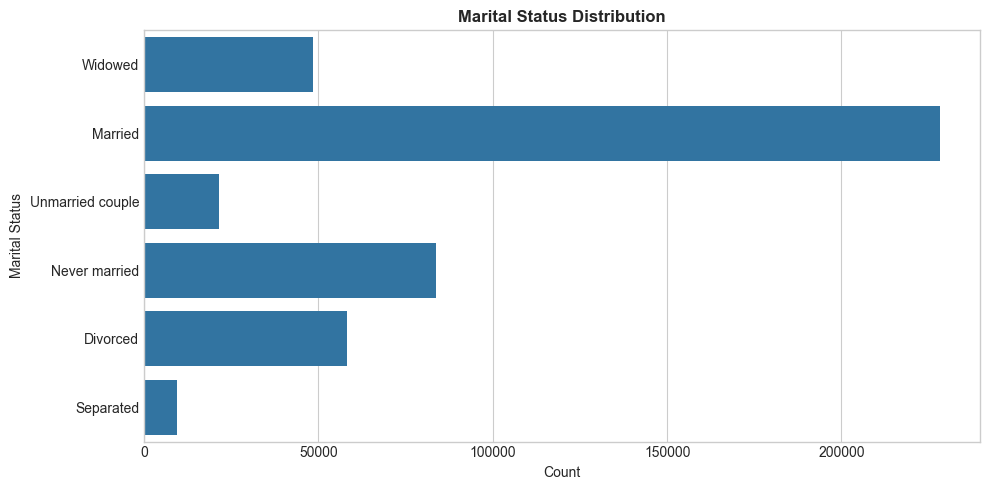

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="MARITAL_LABEL", data=df, color=color)
plt.title("Marital Status Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.tight_layout()
plt.savefig("MARITAL_LABEL_distribution.png", dpi=300)
plt.show()


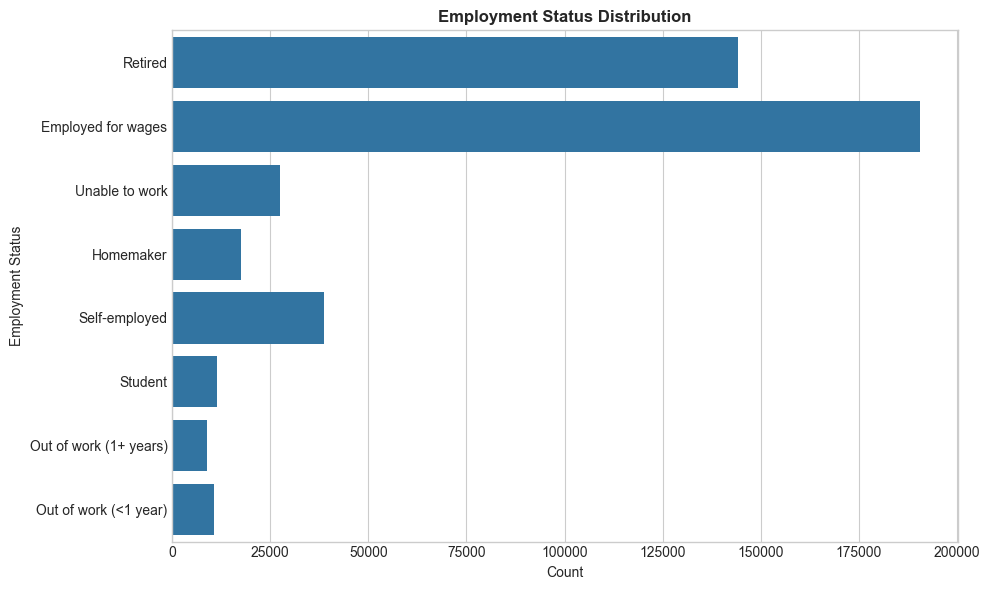

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,6))
sns.countplot(y="EMPLOY1_LABEL", data=df, color=color)
plt.title("Employment Status Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Employment Status")
plt.tight_layout()
plt.savefig("EMPLOY1_LABEL_distribution.png", dpi=300)
plt.show()


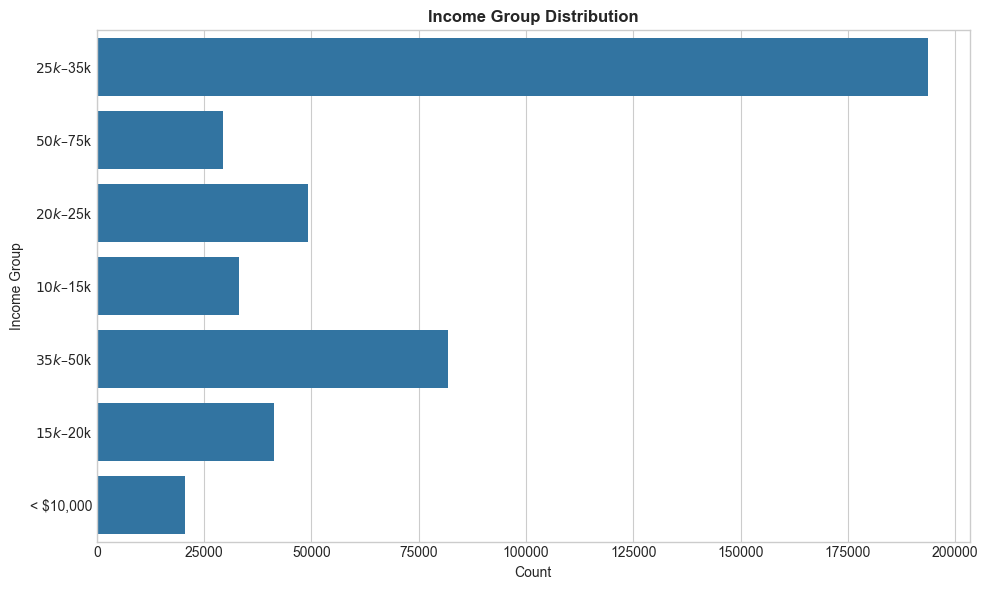

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,6))
sns.countplot(y="_INCOMG1_LABEL", data=df, color=color)
plt.title("Income Group Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Income Group")
plt.tight_layout()
plt.savefig("_INCOMG1_LABEL_distribution.png", dpi=300)
plt.show()


    Most respondents fall in the $25k–35k income range, making it the dominant group.
    
    The next largest group is $35k–50k, while very low-income groups (<$10k) are relatively small.
    
    Overall, the dataset is skewed toward lower to middle-income households.

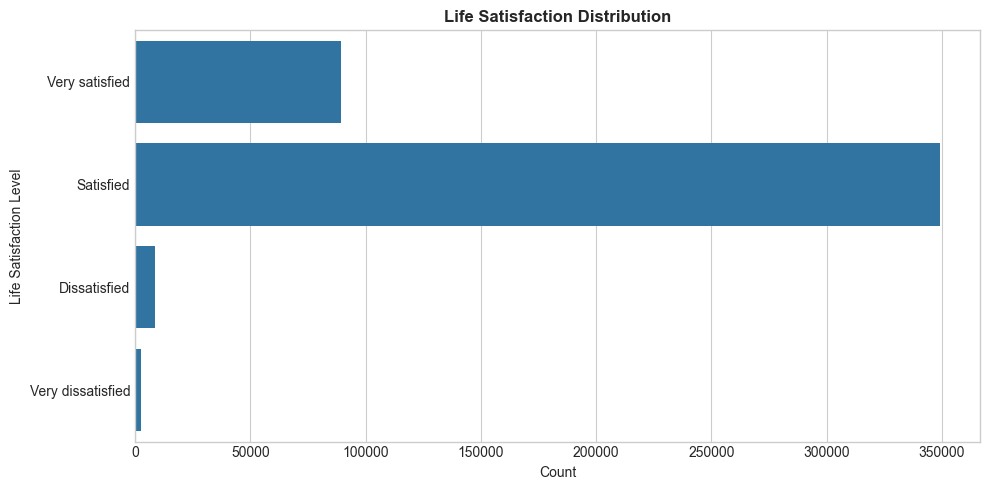

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="LSATISFY_LABEL", data=df, color=color)
plt.title("Life Satisfaction Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Life Satisfaction Level")
plt.tight_layout()
plt.savefig("LSATISFY_LABEL_distribution.png", dpi=300)
plt.show()


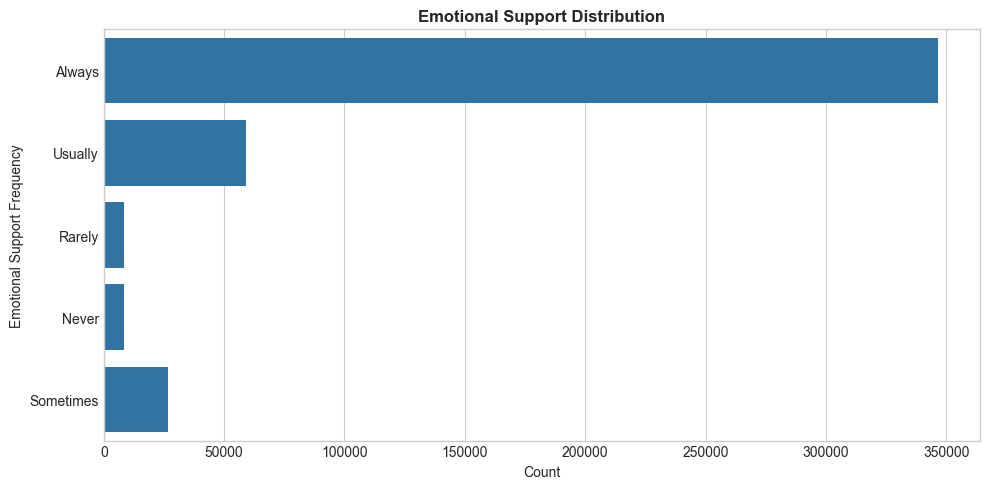

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="EMTSUPRT_LABEL", data=df, color=color)
plt.title("Emotional Support Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Emotional Support Frequency")
plt.tight_layout()
plt.savefig("EMTSUPRT_LABEL_distribution.png", dpi=300)
plt.show()


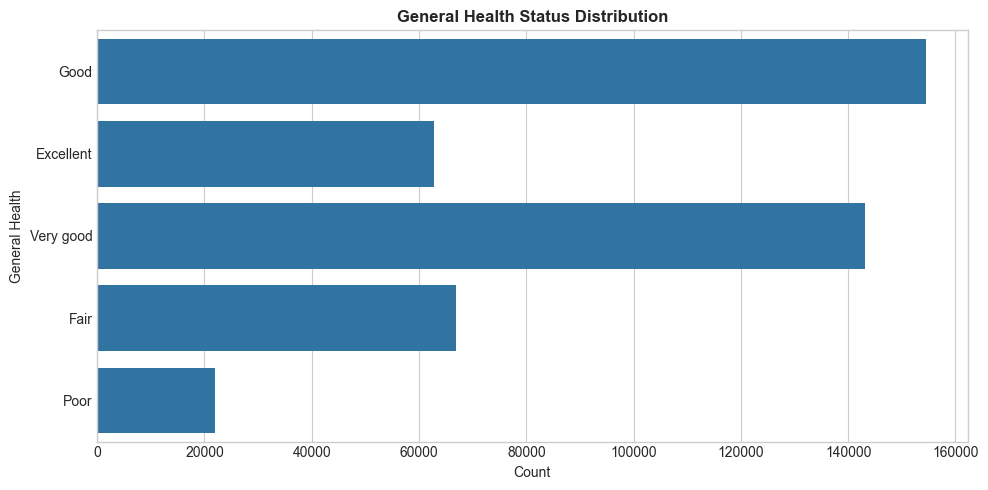

In [122]:
plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="GENHLTH_LABEL", data=df, color=color)
plt.title("General Health Status Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("General Health")
plt.tight_layout()
plt.savefig("GENHLTH_LABEL_distribution.png", dpi=300)
plt.show()


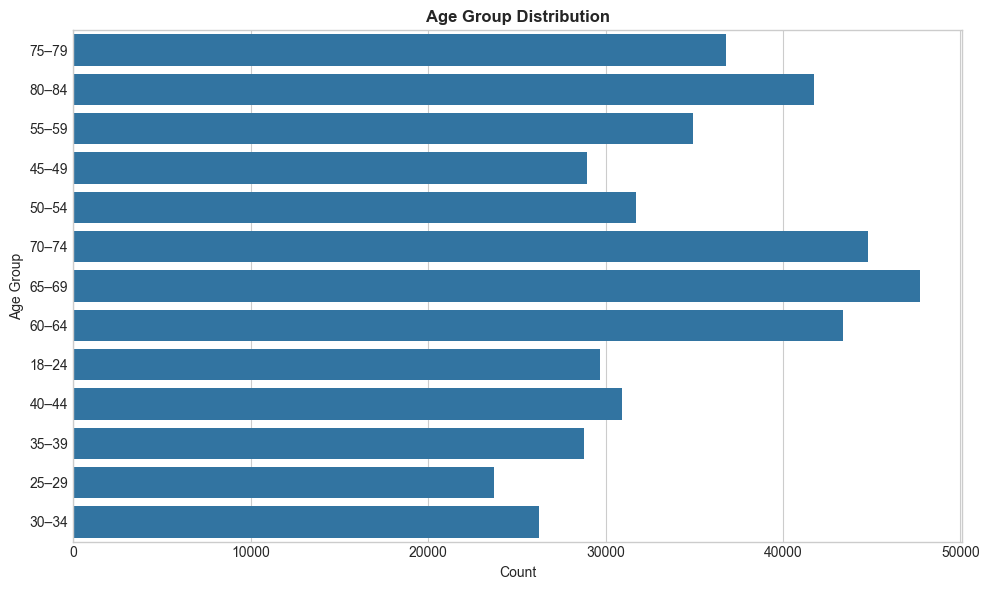

In [123]:
plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,6))
sns.countplot(y="_AGEG5YR_LABEL", data=df, color=color)
plt.title("Age Group Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("_AGEG5YR_LABEL_distribution.png", dpi=300)
plt.show()


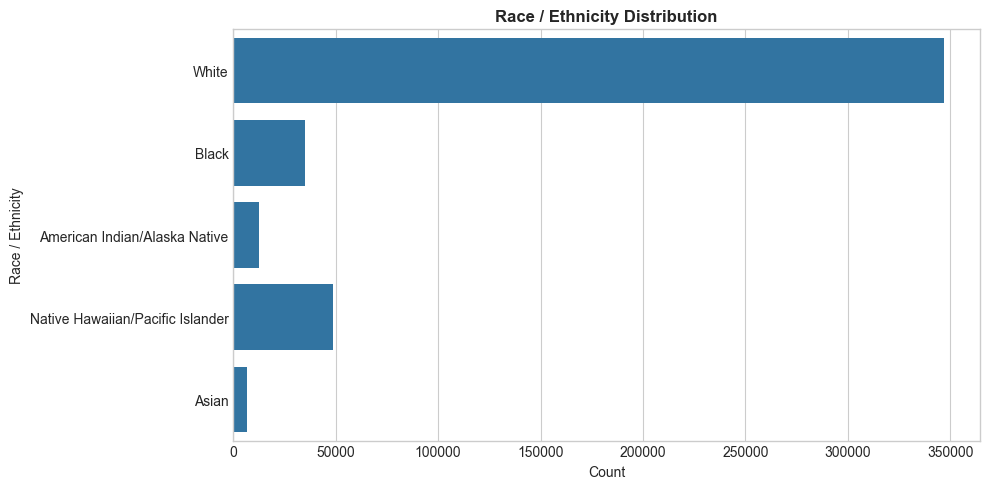

In [124]:
plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="_IMPRACE_LABEL", data=df, color=color)
plt.title("Race / Ethnicity Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Race / Ethnicity")
plt.tight_layout()
plt.savefig("_IMPRACE_LABEL_distribution.png", dpi=300)
plt.show()


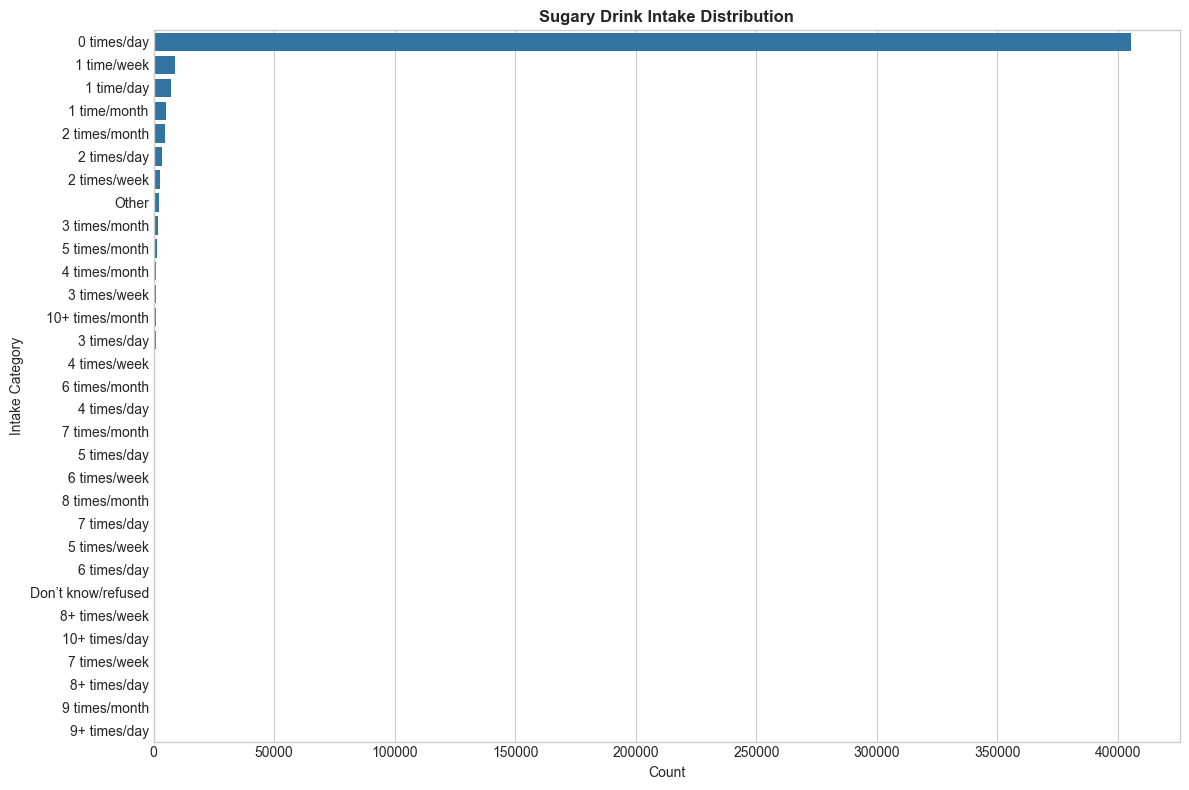

In [125]:
plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

order = df["SSBFRUT3_LABEL"].value_counts().index

plt.figure(figsize=(12,8))
sns.countplot(y="SSBFRUT3_LABEL", data=df, color=color, order=order)
plt.title("Sugary Drink Intake Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Intake Category")
plt.tight_layout()
plt.savefig("SSBFRUT3_LABEL_distribution.png", dpi=300)
plt.show()


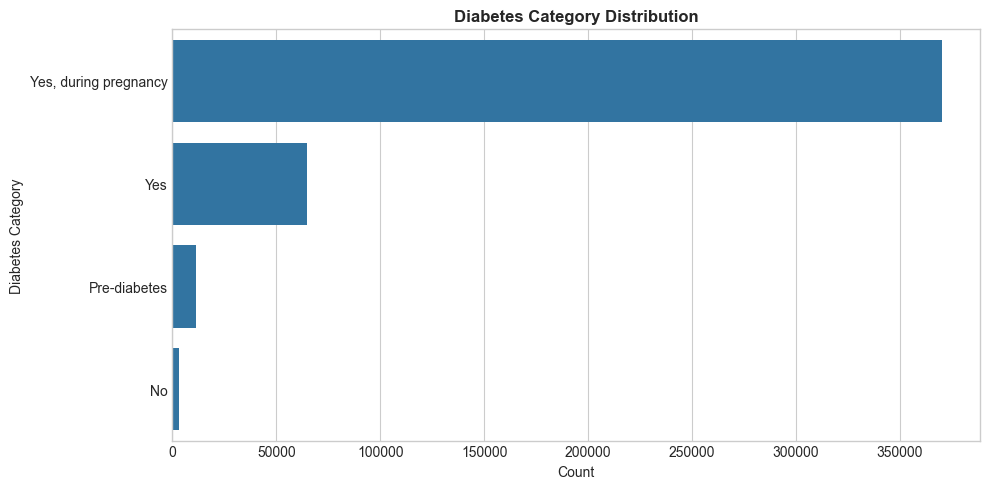

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(10,5))
sns.countplot(y="DIABETE4_LABEL", data=df, color=color)
plt.title("Diabetes Category Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Diabetes Category")
plt.tight_layout()
plt.savefig("DIABETE4_LABEL_distribution.png", dpi=300)
plt.show()


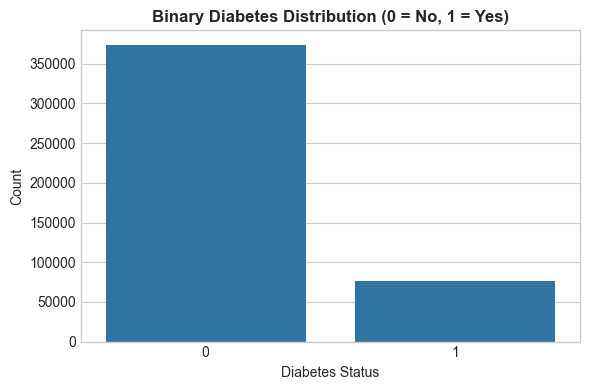

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
color = "#1f77b4"

plt.figure(figsize=(6,4))
sns.countplot(x="DIABETE4", data=df, color=color)
plt.title("Binary Diabetes Distribution (0 = No, 1 = Yes)", fontweight="bold")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("DIABETE4_binary_distribution.png", dpi=300)
plt.show()


# HYPOTHESIS TESTING

## 1. Diabetes vs depression

    #  H1: Diabetes status is associated with depression status.
    #  STEP 1 — Contingency Table

In [29]:
import pandas as pd

ct = pd.crosstab(df['DIABETE4'], df['ADDEPEV3'])
print(ct)

ADDEPEV3     0.0    1.0
DIABETE4               
0         297679  75673
1          56510  19498


In [131]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
chi2, p


(np.float64(1096.272520507401), np.float64(2.133203963653518e-240))

    There is a statistically significant association between diabetes status and depression (chi2 = 1096.27, p < 0.001).
    Individuals with diabetes were significantly more likely to report depression compared to non-diabetics.

## 2 Diabetes vs Emotional support

# Diabetes status is associated with emotional support levels!!!.

In [134]:
import pandas as pd

ct2 = pd.crosstab(df['DIABETE4'], df['EMTSUPRT'])
print(ct2)


EMTSUPRT     1.0    2.0    3.0   4.0   5.0
DIABETE4                                  
0         288733  50218  21376  6737  6288
1          57950   8937   5355  1825  1941


In [135]:
from scipy.stats import chi2_contingency

chi2_2, p_2, dof_2, expected_2 = chi2_contingency(ct2)
chi2_2, p_2


(np.float64(710.8340387845419), np.float64(1.571477392014995e-152))

    There is a statistically significant association between diabetes status and emotional support levels (chi2 = 710.83, p < 0.001).
    Individuals with diabetes reported lower emotional support compared to non-diabetics, indicating emotional or social support may be related to diabetes prevalence.
    
    This is very strong evidence.

## 3 diabetes vs gen health

    H0 (Null Hypothesis):
    
    There is no association between diabetes status and general health.
    
    H1 (Alternative Hypothesis):
    
    There is a significant association between diabetes status and general healt

In [136]:
# Contingency table
ct3 = pd.crosstab(df['DIABETE4'], df['GENHLTH'])
print(ct3)

# Chi-square test
from scipy.stats import chi2_contingency
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(ct3)
chi2_3, p_3


GENHLTH     1.0     2.0     3.0    4.0    5.0
DIABETE4                                     
0         60126  129618  124936  45428  13244
1          2721   13604   29591  21447   8645


(np.float64(32108.241854837142), np.float64(0.0))

    General health status differs significantly between diabetic and non-diabetic individuals (chi2 = 32108.24, p < 0.001).
    Diabetic participants reported poorer general health more frequently than non-diabetics.

## 4 diabetes vs bmi

# Individuals with diabetes have significantly different BMI than non-diabetics.

    H0 (Null Hypothesis):
    
    There is no difference in mean BMI between diabetic and non-diabetic individuals.
    
    H1 (Alternative Hypothesis):
    
    There is a significant difference in mean BMI between diabetic and non-diabetic individuals.

In [140]:
from scipy.stats import ttest_ind

# Split groups
bmi_no = df[df['DIABETE4'] == 0]['_BMI5_ACTUAL']
bmi_yes = df[df['DIABETE4'] == 1]['_BMI5_ACTUAL']

# Means
bmi_no.mean(), bmi_yes.mean()

(np.float64(27.932285001821334), np.float64(31.126621145142614))

In [138]:
# t-test
t4, p4 = ttest_ind(bmi_no, bmi_yes, equal_var=False)
t4, p4

(np.float64(-115.79964389733178), np.float64(0.0))

    # Individuals with diabetes have significantly higher BMI compared to non-diabetics (t = -115.80, p < 0.001). This indicates that higher body mass index is strongly associated with diabetes status.

# 5 Diabetes vs Age (Mean Difference)

    H0 (Null Hypothesis):
    
    There is no difference in mean age between diabetic and non-diabetic individuals.
    
    H1 (Alternative Hypothesis):
    
    There is a significant difference in mean age between diabetic and non-diabetic individuals.

In [143]:
from scipy.stats import ttest_ind

# Split age groups
age_no = df[df['DIABETE4'] == 0]['_AGEG5YR']
age_yes = df[df['DIABETE4'] == 1]['_AGEG5YR']

# Means
age_no.mean(), age_yes.mean()



(np.float64(53.41614615697787), np.float64(64.36543521734555))

In [142]:

# t-test
t5, p5 = ttest_ind(age_no, age_yes, equal_var=False)
t5, p5

(np.float64(-190.00261014495092), np.float64(0.0))

    Conclusion
    
    Individuals with diabetes are significantly older than non-diabetics (t = -190.00, p < 0.001).
    This indicates that age is strongly associated with diabetes prevalence, with diabetes being far more common in older adults.

# 6 Diabetes vs Income Level

    H₀: Diabetes status is not associated with income level.
    H₁: Diabetes status is associated with income level.

In [144]:
# Contingency table
ct_inc = pd.crosstab(df['DIABETE4'], df['_INCOMG1'])
print(ct_inc)

# Chi-square test
from scipy.stats import chi2_contingency
chi2_inc, p_inc, dof_inc, exp_inc = chi2_contingency(ct_inc)
chi2_inc, p_inc


_INCOMG1    1.0    2.0    3.0    4.0     5.0    6.0    7.0
DIABETE4                                                  
0         15390  24586  32262  39492  162175  72386  27061
1          5248   8625   9048   9738   31601   9384   2364


(np.float64(7444.514600728901), np.float64(0.0))

    Conclusion
    
    Income level is significantly associated with diabetes status (chi2 = 7444.51, p < 0.001).
    Lower-income individuals show noticeably higher diabetes prevalence compared to higher-income groups

# 7  Diabetes vs Education Level

    
    H0: Diabetes status is not associated with education level.
    H1: Diabetes status is associated with education level.

In [145]:
# Contingency table
ct_edu = pd.crosstab(df['DIABETE4'], df['EDUCA'])
print(ct_edu)

# Chi-square test
from scipy.stats import chi2_contingency
chi2_edu, p_edu, dof_edu, exp_edu = chi2_contingency(ct_edu)
chi2_edu, p_edu


EDUCA     1.0   2.0    3.0    4.0    5.0     6.0
DIABETE4                                        
0         478  6542  13038  92379  96241  164674
1         223  2610   4018  21830  22484   24843


(np.float64(4215.54490815825), np.float64(0.0))

    Conclusion
    Education level is significantly associated with diabetes status (chi2 = 4215.54, p < 0.001).
    Lower educational attainment is linked with higher diabetes prevalence.


# bivariate analysis

## Checking Hypothis conclusions

### 1. Gen Health association with diabetes

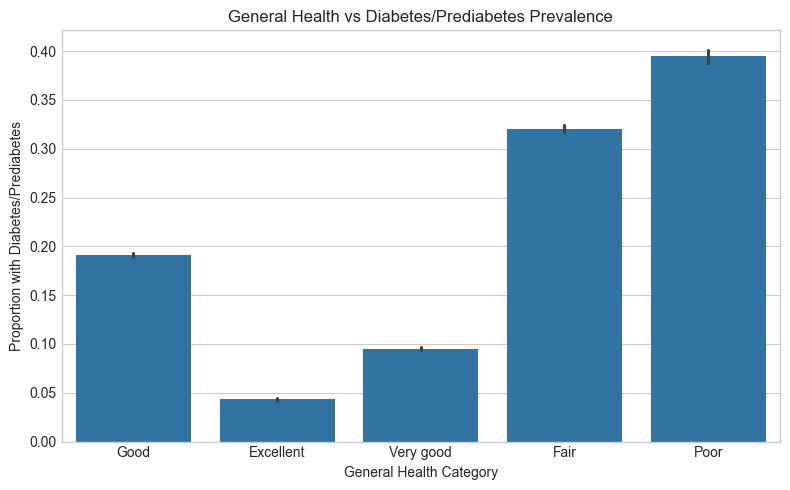

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='GENHLTH_LABEL', y='DIABETE4', data=df)
plt.title("General Health vs Diabetes/Prediabetes Prevalence")
plt.xlabel("General Health Category")
plt.ylabel("Proportion with Diabetes/Prediabetes")
plt.tight_layout()
plt.savefig("GENHLTH_vs_Diabetes.png", dpi=300)
plt.show()


#### The contingency table in Hypothesis (diab vs gen health) section shows that:

Non-diabetic individuals are concentrated in the better health categories (Excellent, Very Good, Good).

Diabetic individuals show much higher counts in Fair and Poor health categories.

#### The bar chart clearly supports hypthesis(# 6 Diabetes vs Income Level) finding:

This pattern is clearly reflected in the bar plot("General Health vs Diabetes/Prediabetes Prevalence"),
where the proportion of diabetes increases steadily as general health worsens. *The visualization and the statistical test both strongly support the hypothesis that:*

##### Individuals with poorer self-reported general health are significantly more likely to have diabetes or prediabetes.

### 2. Income level association with diabetes 

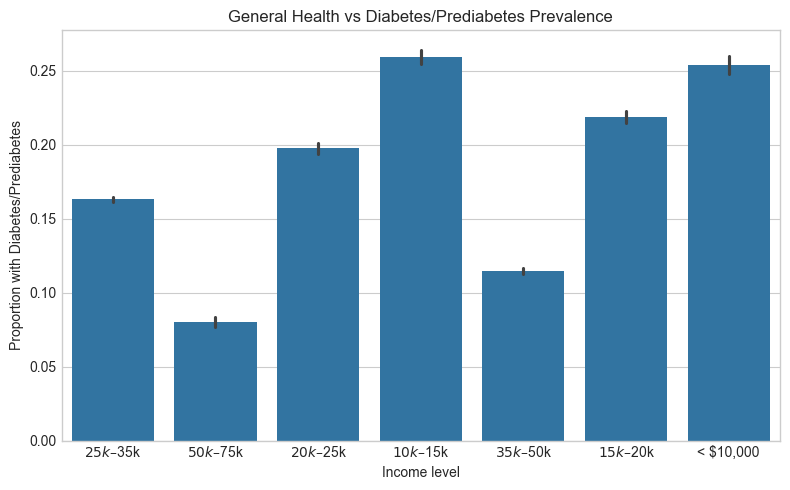

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='_INCOMG1_LABEL', y='DIABETE4', data=df)
plt.title("Income LEVEL vs Diabetes/Prediabetes Prevalence")
plt.xlabel("Income level")
plt.ylabel("Proportion with Diabetes/Prediabetes")
plt.tight_layout()
# plt.savefig("_INCOMG1_vs_Diabetes.png", dpi=300)
plt.show()


## The bar chart clearly supports hypthesis(# 6 Diabetes vs Income Level) finding:

Lower-income groups (e.g., < $10,000, $10k–15k, $15k–20k) show the highest proportions of diabetes/prediabetes.

Middle-income groups ($20k–25k, $25k–35k) show moderate prevalence.

Higher-income groups ($35k–50k, $50k–75k) exhibit substantially lower diabetes prevalence.

Together, the statistical test and the visualization confirm the hypothesis:
### Individuals with lower income levels are significantly more likely to have diabetes or prediabetes compared to higher-income individuals.